# Exercise 3: Advanced Information Retrieval

## Question 1 - Latent Semantic Indexing


In this exercise, we will run latent semantic indexing on a term-document matrix using python numpy library.

Suppose we are given the following term-document matrix containing eleven terms and four documents $d_1$ , $d_2$ , $d_3$ and $d_4$:

$
M =
  \begin{bmatrix}
    d_1 & d_2 & d_3 & d_4 \\ 
	1 & 1 & 1 & 1  \\
	0 & 1 & 1 & 1 \\
	1 & 0 & 0 & 0 \\
	0 & 1 & 0 & 0 \\
    1 & 0 & 0 & 0 \\
    1 & 0 & 1 & 2 \\
    1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 0 \\
    1 & 0 & 0 & 0 \\
    0 & 2 & 1 & 1 \\
    0 & 1 & 1 & 0 \\
  \end{bmatrix}
$


<br>

###  Question 1.a

Compute the singular value decomposition of the term-document matrix M. Print the values of the output matrices $K$, $S$ and $D^t$.


<b>Hint:</b> Use the function numpy.linalg.svd. More details of this function can be found here at this link:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html


Here's sample code:

In [19]:
# import Python matrix operations library
import numpy as np
import math

from helpers import *

#set M matrix using the given values.
M = [[1,1,1,1], 
     [0,1,1,1],
     [1,0,0,0],
     [0,1,0,0],
     [1,0,0,0],
     [1,0,1,2],
     [1,1,1,1],
     [1,1,1,0],
     [1,0,0,0],
     [0,2,1,1],
     [0,1,1,0]]


M = np.array(M)

# compute SVD
# False returns truncated matrices
# True returns square matrices
K,S,Dt = np.linalg.svd(M, full_matrices=False)

print(np.shape(K), np.shape(S), np.shape(Dt))

(11, 4) (4,) (4, 4)



###  Question 1.b

Are the values of $S$ sorted? Perform latent semantic indexing by selecting the first two largest singular values of the matrix $S$.

<b>Hint:</b> See the lecture slides on latent semantic indexing for more details. A sub-matrix of a numpy matrix can be computed using indexing operations (see https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html).


In [27]:
K_sel = K[:,0:2]
S_sel = S[0:2]
Dt_sel = Dt[0:2,:]

# don't need to compute D_sel
# D_sel = np.transpose(M).dot(K_sel).dot(np.linalg.inv(np.diag(S_sel)))
# D_sel = 4 x 2 : (4 documents each of dimension 2 )
D_sel = np.transpose(Dt_sel)
print(D_sel)

###  Question 1.c

Given the query $q$:

$
q =
  \begin{bmatrix}
	0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 1 \\ 1 \\
  \end{bmatrix}
$


Map query $q$ into the new document space $D$. The new query is referred to as $q^*$. 

<b>Hint:</b> Use the formulation for mapping queries provided in the lecture slides. You can also use np.linalg.inv function for computing the inverse of a matrix.

In [3]:
q = np.array([0,0,0,0,0,1,0,0,0,1,1])
qstar = np.transpose(q).dot(K_sel).dot(np.linalg.inv(np.diag(S_sel)))
qstar = np.squeeze(qstar)

###  Question 1.d

Arrange the documents based on the cosine similarity measure between $q^*$ and the new documents in the space $D$.

<b>Hint:</b> Use the cosine similarity function from the previous exercise on vector space retrieval.

In [4]:
scores = []
for i in range(np.shape(D_sel)[0]):
    scores.append([cosine_similarity(qstar,D_sel[i,:]),i])    
scores.sort(key=lambda x: -x[0])
print(scores)

[[0.9524776244205612, 2], [0.9388827727147442, 1], [0.5931086268074783, 3], [-0.012057913278690477, 0]]


###  Question 1.e

Does the order of documents change if document $d_3$ is dropped? If yes, why? 
If no, how should $d_3$ be modified to change the document ordering?

### Question 1.f [Optional]

Run latent semantic indexing for the document collection presented in the previous exercise (presented here as well):

  DocID | Document Text
  ------|------------------
  1     | How to Bake Breads Without Baking Recipes
  2     | Smith Pies: Best Pies in London
  3     | Numerical Recipes: The Art of Scientific Computing
  4     | Breads, Pastries, Pies, and Cakes: Quantity Baking Recipes
  5     | Pastry: A Book of Best French Pastry Recipes

Now, for the query $Q=$''<i>baking</i>'', find the top ranked documents according to LSI (use three singular values). 

<b>Hint:</b> Use the code for computing document_vectors from the last exercise. However note that document_vectors represent document-term matrix whereas LSI uses term-document matrix.

In [5]:
# Read a list of documents from a file. Each line in a file is a document
with open("bread.txt") as f:
    content = f.readlines()
    
# strip to remove whitespace - https://docs.python.org/3/library/stdtypes.html#str.strip
original_documents = [x.strip() for x in content] 

# after tokenize, split each document, resulting in a list of list
documents = [tokenize(d).split() for d in original_documents]

# create the vocabulary
vocabulary = set([item for sublist in documents for item in sublist])
vocabulary = [word for word in vocabulary if word not in stopwords.words('english')]
vocabulary.sort()

# Compute IDF values and vectors
idf = idf_values(vocabulary, documents)
document_vectors = [vectorize(s, vocabulary, idf) for s in documents]
document_vectors = np.transpose(document_vectors)

Compute the SVD and extract the top 2 components

In [6]:
# compute SVD
K,S,Dt = np.linalg.svd(document_vectors)

# select top 2
K_sel = K[:,0:2]
S_sel = S[0:2]
Dt_sel = Dt[0:2,:]
document_vectors_sel = np.transpose(document_vectors).dot(K_sel).dot(np.linalg.inv(np.diag(S_sel)))

compute query vector

In [7]:
query = "baking"
q = query.split()
q = [stemmer.stem(w) for w in q]
query_vector = vectorize(q, vocabulary, idf)

query_vector_star = np.transpose(query_vector).dot(K_sel).dot(np.linalg.inv(np.diag(S_sel)))
query_vector_star = np.squeeze(query_vector_star)

compute similarity score

In [8]:
scores = []
for i in range(np.shape(document_vectors_sel)[0]):
    scores.append([cosine_similarity(query_vector_star,document_vectors_sel[i,:]),i])    
scores.sort(key=lambda x: -x[0])

# show result
for i in range(len(document_vectors_sel)):
    print(original_documents[scores[i][1]], scores[i][0])

Smith Pies: Best Pies in London 0.999997005794707
Breads, Pastries, Pies, and Cakes: Quantity Baking Recipes 0.9999923114489846
How to Bake Breads Without Baking Recipes 0.9998956175217134
Pastry: A Book of Best French Pastry Recipes 0.9997836574793942
Numerical Recipes: The Art of Scientific Computing -0.004408564050944133



## Question 2 - Word Embeddings

In this exercise, we would train word embeddings using a state-of-the-art embeddings library fastText. The first step of the exercise is to install the fastText library. Proceed with the following steps:

### FastText installation


#### Run these commands on the shell terminal:

> wget https://github.com/facebookresearch/fastText/archive/v0.1.0.zip <br>
> unzip v0.1.0.zip<br>
> cd fastText-0.1.0 <br>
> make<br>

<br>

Move the epfldocs.txt file (provided in the last exercise) to the current directory. Sample command (linux) for copying the file into current directory is as follows:

> cp directory_path/epfldocs.txt ./

<br>

### Generate Embeddings

Further, generate fasttext embeddings for the epfldocs.txt file using the following command:

> ./fasttext skipgram -input epfldocs.txt -output model_epfldocs


The above command generates word embeddings and stores them in a file named model_epfldocs.vec.

<br>

### Load Embeddings

In the second phase of this exercise, we will load these embeddings into memory using python and visualize them.
Use the following python code to load the embeddings into memory:<br><br>



In [29]:
import sys
import codecs
import numpy as np
import os

def load_embeddings(file_name):
    with codecs.open(file_name, 'r', 'utf-8') as f_in:
        lines = f_in.readlines()
        lines = lines[1:]
        vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in lines])
    wv = np.loadtxt(wv)
    return wv, vocabulary


# Replace the path based on your own machine.
word_embeddings, vocabulary = load_embeddings(os.getcwd() + '/fastText-0.1.0/model_epfldocs.vec')




### Visualize Embeddings

In the third phase of this exercise, we will visualize the generated embeddings. First install the tsne library using pip: https://github.com/danielfrg/tsne/issues/4

> $ sudo apt-get install libblas-dev libatlas-base-dev

> $ pip install tsne

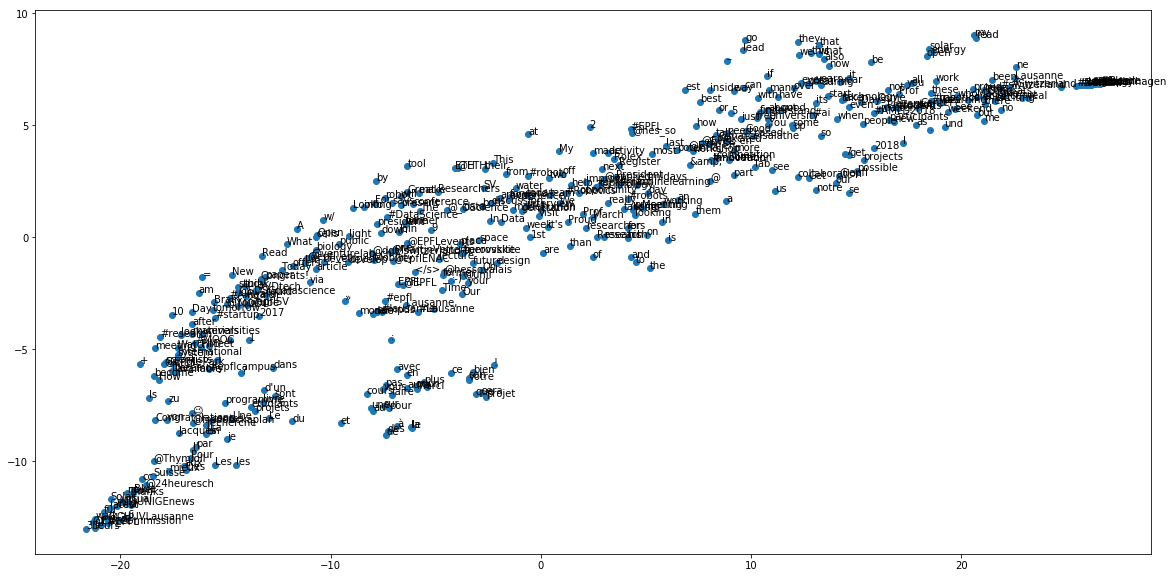

In [30]:
from tsne import bh_sne
import matplotlib.pyplot as plt
import logging

vis_data = bh_sne(word_embeddings)

vis_data_x = vis_data[:,0]
vis_data_y = vis_data[:,1]

plt.figure(figsize=(20,10))
plt.scatter(vis_data_x, vis_data_y)
for label, x, y in zip(vocabulary, vis_data_x, vis_data_y):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

### Question 2.a

Observe the plot of word embeddings. Do you observe any patterns?

### Question 2.b

Write a python function to find the most similar terms for a given term. The similarity between two terms is defined as the cosine similarity between their corresponding word embeddings.

Find the top 3 terms that are most similar to 'la', 'EPFL', '#robot', 'this',

In [38]:
we1 = word_embeddings[vocabulary.index('EPFL')]
scores = []
for i in range(len(vocabulary)):
    scores.append([cosine_similarity(we1,word_embeddings[i,:]),i])
scores.sort(key=lambda x: -x[0])

# show result
for i in range(3):
    print(vocabulary[scores[i][1]], scores[i][0])

EPFL 1.0000000000000002
@EPFL 0.8932894147046836
Une 0.8395618266207959


### Question 2.c [Optional]

Download the text file using the following command:

> wget http://mattmahoney.net/dc/text8.zip -O text8.gz <br>
> tar -xvf text8.gz 


The above command creates a text file named 'text8'. Regenerate the fasttext embeddings using the text8 file. Plot the word embeddings for first 1000 terms in the vocabulary.

### Question 2.d [Optional]

Observe the word embeddings that are visualized in this link http://www.anthonygarvan.com/wordgalaxy/ . Can you make some interesting observations? 